In [212]:
from tabulate import tabulate
from functions import f1, gradient_f1, f2, gradient_f2
from plotter import plotter_1D, plotter_2D
from gradientdescent import GradientDescent
import numpy as np

In [ ]:
fx = GradientDescent(0.03, 10)
fx.solve(gradient_f1, 2.82, f1)
plotter_1D(f1, x_range=(-3,3), num_points=100, title="$f(x) = \\frac{1}{4}x^4$", y_label='f(x)')

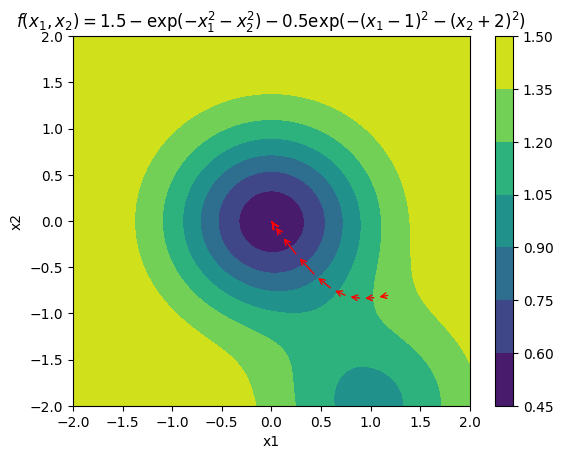

In [206]:
gx = GradientDescent(0.4, 15)
gx.solve(gradient_f2, np.array([1.2, -0.8]), f2)
plotter_2D(f2, domain=[(-2, 2), (-2, 2)], num_points=100,
              title="$f(x_1, x_2) = 1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$")

In [235]:
test_beta = [0.01, 0.03, 0.1, 0.15, 0.23, 0.25, 0.35, 0.46, 0.68]
descent_values = []
experiment_beta_fx = GradientDescent(0.01, 100)
for beta in test_beta:
    experiment_beta_fx.set_learning_rate(beta)
    descent_values.append(experiment_beta_fx.solve(experiment_beta_fx.gradient_f1, 2.79, experiment_beta_fx.f1))

table_beta_fx = {'beta' : test_beta, 'initial x0' : [2.79]*9, 'Final x' : descent_values, 'Iterations' : [100]*9}
print(tabulate(table_beta_fx, headers='keys', tablefmt='fancy_grid'))

╒════════╤══════════════╤═════════════╤══════════════╕
│   beta │   initial x0 │     Final x │   Iterations │
╞════════╪══════════════╪═════════════╪══════════════╡
│   0.01 │         2.79 │   0.678549  │          100 │
├────────┼──────────────┼─────────────┼──────────────┤
│   0.03 │         2.79 │   0.397906  │          100 │
├────────┼──────────────┼─────────────┼──────────────┤
│   0.1  │         2.79 │   0.209679  │          100 │
├────────┼──────────────┼─────────────┼──────────────┤
│   0.15 │         2.79 │  -0.169676  │          100 │
├────────┼──────────────┼─────────────┼──────────────┤
│   0.23 │         2.79 │   0.12882   │          100 │
├────────┼──────────────┼─────────────┼──────────────┤
│   0.25 │         2.79 │   0.0714616 │          100 │
├────────┼──────────────┼─────────────┼──────────────┤
│   0.35 │         2.79 │ nan         │          100 │
├────────┼──────────────┼─────────────┼──────────────┤
│   0.46 │         2.79 │ nan         │          100 │
├────────┼

/tmp/ipykernel_9713/72781665.py:42: RuntimeWarning: overflow encountered in scalar power
  return 1/4 * x**4
/tmp/ipykernel_9713/72781665.py:32: RuntimeWarning: overflow encountered in scalar power
  return x**3
/tmp/ipykernel_9713/72781665.py:21: RuntimeWarning: invalid value encountered in subtract
  x0 = np.subtract(x0, d * self.beta)


In [241]:
test_iteration = [5, 10, 100, 500, 1000, 5000, 10000, 15000, 20000]
descent_values = []
experiment_iter_fx = GradientDescent(0.01, 100)
for n_iter in test_iteration:
    experiment_iter_fx.set_iterations(n_iter)
    descent_values.append(experiment_iter_fx.solve(experiment_iter_fx.gradient_f1, 2.79, experiment_iter_fx.f1))

table_iter_fx = {'Iterations' : test_iteration, 'beta' : [0.01] * 9, 'initial x0' : [2.79]*9, 'Final x' : descent_values, }
print(tabulate(table_iter_fx, headers='keys', tablefmt='fancy_grid'))

╒══════════════╤════════╤══════════════╤═══════════╕
│   Iterations │   beta │   initial x0 │   Final x │
╞══════════════╪════════╪══════════════╪═══════════╡
│            5 │   0.01 │         2.79 │ 2.04874   │
├──────────────┼────────┼──────────────┼───────────┤
│           10 │   0.01 │         2.79 │ 1.70516   │
├──────────────┼────────┼──────────────┼───────────┤
│          100 │   0.01 │         2.79 │ 0.678549  │
├──────────────┼────────┼──────────────┼───────────┤
│          500 │   0.01 │         2.79 │ 0.313187  │
├──────────────┼────────┼──────────────┼───────────┤
│         1000 │   0.01 │         2.79 │ 0.222467  │
├──────────────┼────────┼──────────────┼───────────┤
│         5000 │   0.01 │         2.79 │ 0.0998855 │
├──────────────┼────────┼──────────────┼───────────┤
│        10000 │   0.01 │         2.79 │ 0.0706683 │
├──────────────┼────────┼──────────────┼───────────┤
│        15000 │   0.01 │         2.79 │ 0.0577114 │
├──────────────┼────────┼──────────────┼──────

In [245]:
test_start = np.random.uniform(-10, 10, 9)
descent_values = []
experiment_start_fx = GradientDescent(0.01, 1000)
for x0 in test_start:
    descent_values.append(experiment_start_fx.solve(experiment_start_fx.gradient_f1, x0, experiment_start_fx.f1))

table_start_fx = {'beta' : [0.01] * 9, 'Iterations' : [1000] * 9,  'initial x0' : test_start, 'Final x' : descent_values, }
print(tabulate(table_start_fx, headers='keys', tablefmt='fancy_grid'))

╒════════╤══════════════╤══════════════╤═══════════╕
│   beta │   Iterations │   initial x0 │   Final x │
╞════════╪══════════════╪══════════════╪═══════════╡
│   0.01 │         1000 │      4.61814 │  0.22282  │
├────────┼──────────────┼──────────────┼───────────┤
│   0.01 │         1000 │     -3.6276  │ -0.222709 │
├────────┼──────────────┼──────────────┼───────────┤
│   0.01 │         1000 │     -0.49141 │ -0.203415 │
├────────┼──────────────┼──────────────┼───────────┤
│   0.01 │         1000 │     -2.45254 │ -0.222282 │
├────────┼──────────────┼──────────────┼───────────┤
│   0.01 │         1000 │      2.07045 │  0.221944 │
├────────┼──────────────┼──────────────┼───────────┤
│   0.01 │         1000 │      9.05262 │  0.221323 │
├────────┼──────────────┼──────────────┼───────────┤
│   0.01 │         1000 │     -2.61872 │ -0.222383 │
├────────┼──────────────┼──────────────┼───────────┤
│   0.01 │         1000 │      1.47173 │  0.220761 │
├────────┼──────────────┼──────────────┼──────